<a href="https://colab.research.google.com/github/syamsulrizal123/TA_Covid19/blob/main/template_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
ls

'11101170108-a.razaq galang triansyah -tt4107.pdf'
'(1) 1101170108 Registrasi _ Telkom University.PDF'
'12777_a.razaq galang triansyah s..pdf'
 19-06-2020-17.50.43.pdf
'2018-08-28 01.08.31 1-min.jpg'
'20181027_071958 (1).jpg'
 20181027_071958.jpg
'215430_DATABASE ASISTEN LABORATORIUM TEKNIK DIGITAL - LastUpdate 5Feb2015.gsheet'
'63513_Profile (2).pdf'
 best_weight_scene_vgg16.h5
 Classroom/
'Colab Notebooks'/
 Covid@
 COVID-CTset@
'culture of lombok - tugas pengganti a.razaq galang triansyah s. (1101170108).mp4'
 dataset/
 data_test/
 DOC-20180822-WA0001.docx
'DOC-20180822-WA0001 - galang triansyah (1).docx'
'DOC-20180822-WA0001 - galang triansyah.docx'
'Dokumen tanpa judul (1).gdoc'
'Dokumen tanpa judul (2).gdoc'
'Dokumen tanpa judul.gdoc'
 DSC_0228.JPG
 DSC_0229.JPG
 DSC_0234.MOV
 DSC_0236.MOV
 DSC_0248.JPG
 DSC_0249.JPG
 DSC_0250.JPG
 DSC_0251.JPG
 DSC_0252.JPG
 DSC_0253.JPG
 DSC_0254.JPG
 DSC_0255.JPG
 DSC_0256.JPG
 DSC_0257.JPG
 DSC_0258.JPG
 DSC_0259.JPG
 DSC_0260.JPG
 DSC_0261.J

In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import matplotlib.pyplot as plt

import numpy as np
import os

In [ ]:
import PIL.Image as pil_image
import io
path ='/content/drive/MyDrive/Selected Covidset/Covid'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    array=np.array(img)
    max_val=np.amax(array)
    normalized=(array/max_val)
    im = pil_image.fromarray(normalized)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/dataset/covid' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/dataset/covid' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/dataset/covid' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

In [ ]:
from skimage import io
from skimage.filters import gaussian
path ='/content/drive/MyDrive/hasil tes dataset/'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    gausfilter = gaussian(img, sigma=1, mode='constant', cval=0.0)
    im = Image.fromarray(gausfilter)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/output gaussian filter/' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/output gaussian filter/' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/output gaussian filter/' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

In [ ]:
from skimage import exposure
path ='/content/drive/MyDrive/hasil tes dataset/'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    clahe = exposure.equalize_adapthist(img)
    im = Image.fromarray(clahe)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/output CLAHE/' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/output CLAHE/' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/output CLAHE/' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("CLAHE Success")

CLAHE Success


In [183]:
print("[INFO] loading images...")
imagePaths = paths.list_images("Selected Covidset") 
data = []
labels = []

[INFO] loading images...


In [184]:
for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
  image = Image.open(imagePath)
  image = image.convert('RGB')
  image = image.resize((224,224))
  image = np.array(image)
  data.append(image)

  # extract the class label from the file path and update the
	# labels list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

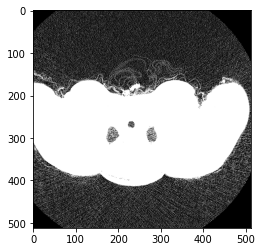

In [194]:
img = Image.open('/content/drive/MyDrive/Selected Covidset/Covid/IM00008.tif')
img= img.convert('RGB')
plt.imshow(img)


In [185]:
print(labels)

['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 

In [186]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
labels = encoder.transform(labels)

In [187]:
print(labels)

[0 0 0 ... 1 1 1]


In [188]:
data = np.array(data)
data.shape

(1082, 224, 224, 3)

In [189]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(811, 224, 224, 3)
(271, 224, 224, 3)
(811,)
(271,)


In [190]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [177]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [191]:
model.summary()


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_182 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_184 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_185 (Conv2D)          (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_186 (Conv2D)          (None, 56, 56, 256)     

In [192]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_vgg16_1.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [193]:
print("[INFO] training network...")
opt = SGD(lr=1e-3, decay=1e-6)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es, checkpoint])

[INFO] training network...
Epoch 1/50
26/26 [==============================] - 32s 807ms/step - loss: 0.6546 - accuracy: 0.6050 - val_loss: 0.5498 - val_accuracy: 0.8745

Epoch 00001: val_accuracy improved from -inf to 0.87454, saving model to best_weight_vgg16_1.h5
Epoch 2/50
26/26 [==============================] - 12s 473ms/step - loss: 0.5620 - accuracy: 0.7170 - val_loss: 1.0200 - val_accuracy: 0.5572

Epoch 00002: val_accuracy did not improve from 0.87454
Epoch 3/50
26/26 [==============================] - 12s 464ms/step - loss: 0.6114 - accuracy: 0.6756 - val_loss: 0.4412 - val_accuracy: 0.7823

Epoch 00003: val_accuracy did not improve from 0.87454
Epoch 4/50
26/26 [==============================] - 12s 460ms/step - loss: 0.4584 - accuracy: 0.8042 - val_loss: 0.4608 - val_accuracy: 0.6900

Epoch 00004: val_accuracy did not improve from 0.87454
Epoch 5/50
26/26 [==============================] - 12s 459ms/step - loss: 0.4116 - accuracy: 0.8467 - val_loss: 0.4319 - val_accuracy: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


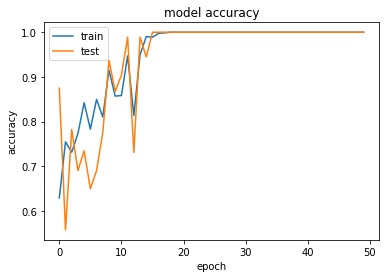

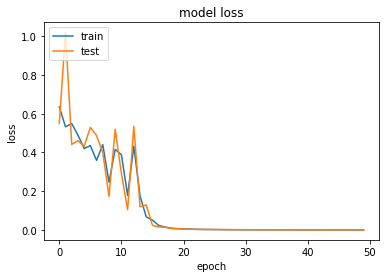

In [195]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [200]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=0),
	predictions.argmax(axis=0), target_names=lb.classes_))

[INFO] evaluating network...


TypeError: ignored

In [197]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [ ]:
import cv2
import matplotlib.pyplot as plt
image1='forest_test.jpg'

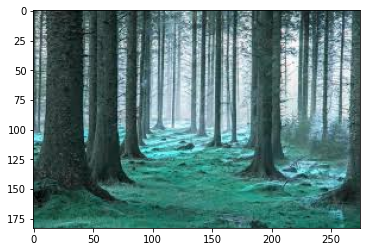

In [ ]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [ ]:
image_testing = Image.open('forest_test.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [ ]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.02508735 0.9703354  0.00457713]]
['forest']
